In [5]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
sc = MinMaxScaler(feature_range=(0,1)) #normalisasi dari 0 - 
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [6]:
data_path = "../data_after_prep"

In [7]:
list_data = os.listdir(data_path)
list_data

['ADRO2001-2407.csv',
 'AMMN2001-2407.csv',
 'AMRT2001-2407.csv',
 'ASII2001-2407.csv',
 'BBCA2001-2407.csv',
 'GOTO2001-2407.csv',
 'KLBF2001-2407.csv',
 'MAPI2001-2407.csv',
 'TLKM2001-2407.csv']

In [13]:
ADRO = pd.read_csv(data_path + "/" + list_data[0], index_col='date', parse_dates=['date'])
AMMN = pd.read_csv(data_path + "/" + list_data[1], index_col='date', parse_dates=['date'])
AMRT = pd.read_csv(data_path + "/" + list_data[2], index_col='date', parse_dates=['date'])
ASII = pd.read_csv(data_path + "/" + list_data[3], index_col='date', parse_dates=['date'])
BBCA = pd.read_csv(data_path + "/" + list_data[4], index_col='date', parse_dates=['date'])
GOTO = pd.read_csv(data_path + "/" + list_data[5], index_col='date', parse_dates=['date'])
KLBF = pd.read_csv(data_path + "/" + list_data[6], index_col='date', parse_dates=['date'])
MAPI = pd.read_csv(data_path + "/" + list_data[7], index_col='date', parse_dates=['date'])
TLKM = pd.read_csv(data_path + "/" + list_data[8], index_col='date', parse_dates=['date'])



In [35]:
def LSTM_Layer(X_train, y_train, num_epoch):
    # The LSTM architecture
    regressorLSTM = Sequential()
    # First LSTM layer with Dropout regularisation
    regressorLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
    regressorLSTM.add(Dropout(0.2))
    # Second LSTM layer
    regressorLSTM.add(LSTM(units=50, return_sequences=True))
    regressorLSTM.add(Dropout(0.2))
    # Third LSTM layer
    regressorLSTM.add(LSTM(units=50, return_sequences=True))
    regressorLSTM.add(Dropout(0.2))
    # Fourth LSTM layer
    regressorLSTM.add(LSTM(units=50))
    regressorLSTM.add(Dropout(0.2))
    # The output layer
    regressorLSTM.add(Dense(units=1))

    # Compiling the RNN
    regressorLSTM.compile(optimizer='rmsprop',loss='mean_squared_error')
    # Fitting to the training set
    history = regressorLSTM.fit(X_train,y_train,epochs=num_epoch,batch_size=32)

    return history

In [15]:
def GRU_Layer(X_train, y_train):
    # The GRU architecture
    regressorGRU = Sequential()
    # First GRU layer with Dropout regularisation
    regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # Second GRU layer
    regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # Third GRU layer
    regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # Fourth GRU layer
    regressorGRU.add(GRU(units=50, activation='tanh'))
    regressorGRU.add(Dropout(0.2))
    # The output layer
    regressorGRU.add(Dense(units=1))
    # Compiling the RNN
    regressorGRU.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

    return regressorGRU

In [17]:
def RNN_Layer(X_train, y_train):
    # initializing the RNN
    regressorRNN = Sequential()
    # # adding first RNN layer and dropout regulatization
    regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )
    regressorRNN.add(
    Dropout(0.2)
             )
    # adding second RNN layer and dropout regulatization
    regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )
    regressorRNN.add(
    Dropout(0.2)
             )
    # adding third RNN layer and dropout regulatization
    regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )
    regressorRNN.add(
    Dropout(0.2)
             )
    # adding fourth RNN layer and dropout regulatization
    regressorRNN.add(
    SimpleRNN(units = 50)
             )
    regressorRNN.add(
    Dropout(0.2)
             )
    # adding the output layer
    regressorRNN.add(Dense(units = 1))
    # compiling RNN
    regressorRNN.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])
    # fitting the RNN
    regressorRNN.fit(X_train, y_train, epochs = 50, batch_size = 32)

    return regressorRNN


In [30]:
#Method
# Some functions to help out with
def plot_predictions(stock_title,test,predicted, title):
    plt.plot(test, color='red',label='Real '+ stock_title+' Stock Price')
    plt.plot(predicted, color='blue',label='Predicted '+ stock_title+' Stock Price')
    plt.title(stock_title + ' Stock Price Prediction '+title)
    plt.xlabel('Time')
    plt.ylabel(stock_title +' Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

def return_rmse_norm(test, pred):
    len_pred = len(pred)
    #pred = pred.reshape(len_pred)
    total = np.concatenate((pred, test))
    #total = total.reshape(-1,1)
    total = sc.fit_transform(total)
    arr_pred = total[len_pred:]
    arr_test = total[:len_pred]
    rmse = math.sqrt(mean_squared_error(arr_test, arr_pred))
    print("The root mean squared error after normalization is {}.".format(rmse))
    return rmse

def get_train_test_data(data, start_date, med_date, end_date):
    value_data_train = data[start_date:med_date].iloc[:,3:4].values
    data_train = data["close"][start_date:med_date]
    value_data_test = data[med_date:end_date].iloc[:,3:4].values
    data_test = data["close"][med_date:end_date]
    return value_data_train, value_data_test, data_train, data_test


def get_train_test_data_long(data, year):
    value_data_train = data[:year].iloc[:,3:4].values
    data_train = data["close"][:year]
    value_data_test = data[year:].iloc[:,3:4].values
    data_test = data["close"][year]
    return value_data_train, value_data_test, data_train, data_test

def split_data_train_timestep(data_train, timestep):
    len_train = len(data_train)
    #Scaling the training set
    sc = MinMaxScaler(feature_range=(0,1))
    training_set_scaled = sc.fit_transform(data_train)
    X_train = []
    y_train = []
    for i in range(timestep,len_train):
        X_train.append(training_set_scaled[i-timestep:i,0])
        y_train.append(training_set_scaled[i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    return X_train, y_train


def split_data_test_timestep(data,  start_date, med_date, end_date, timestep):
    len_test = len(data["close"][med_date:end_date])
    dataset_total = pd.concat((data["close"][start_date:med_date],data["close"][med_date:end_date]),axis=0)
    inputs = dataset_total[len(dataset_total)-len_test - timestep:].values
    inputs = inputs.reshape(-1,1)
    inputs  = sc.fit_transform(inputs)
    
    # Preparing X_test and predicting the prices
    X_test = []
    for i in range(timestep,len_test+timestep):
        X_test.append(inputs[i-timestep:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))   
    return X_test

def predict_using_regressor(regressor, X_test):
    predicted_stock = regressor.predict(X_test)
    predicted_stock = sc.inverse_transform(predicted_stock)
    return predicted_stock



In [38]:
#short term data
start_date = "2024-07-01"
med_date = "2024-07-19"
end_date = "2024-07-31"

#long term data
year = 2023

## ASII

### Short Term Predictions

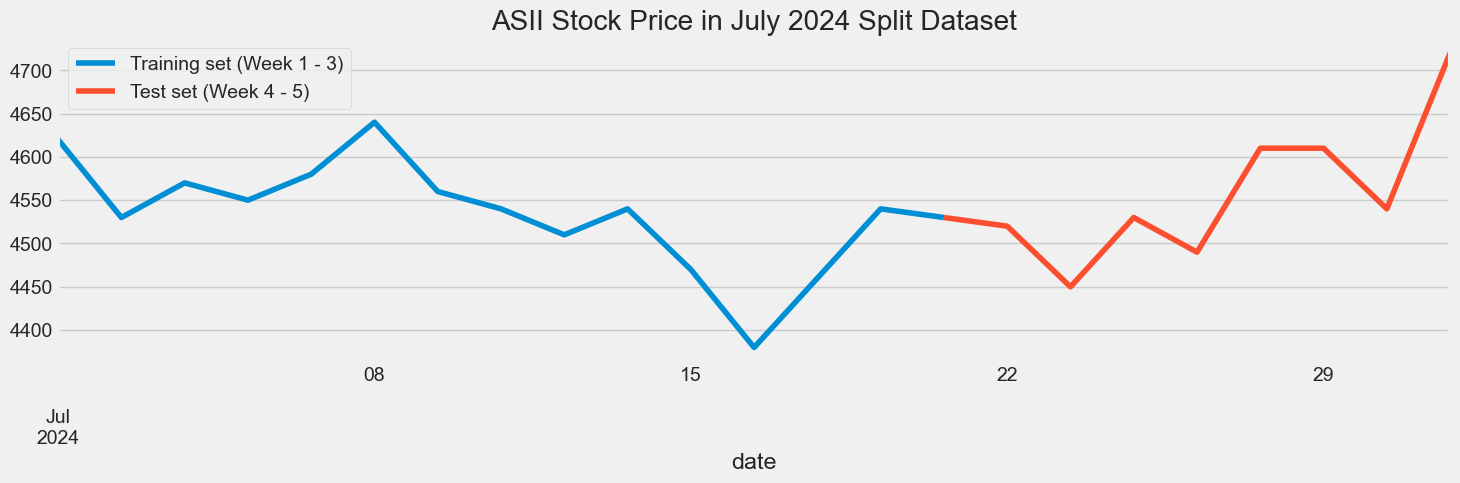

In [39]:
ASII["close"][start_date:med_date].plot(figsize=(16,4), legend=True)
ASII["close"][med_date:end_date].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (Week 1 - 3)","Test set (Week 4 - 5)"])
plt.title('ASII Stock Price in July 2024 Split Dataset')
plt.show()

In [42]:
ASII_short_train = ASII[start_date:med_date].iloc[:,3:4].values
ASII_short_test = ASII[med_date:end_date].iloc[:,3:4].values

#Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(ASII_short_train)
len_train = len(ASII_short_train)
len_test = len(ASII_short_test)
print(len_train, len_test)

# Since LSTMs store long term memory state, we create a data structure with 5 timesteps and 1 output
# So for each element of training set, we have 5 previous training set elements 
X_train = []
y_train = []
for i in range(5,len_train):
    X_train.append(training_set_scaled[i-5:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# The LSTM architecture
regressorLSTM = Sequential()
# First LSTM layer with Dropout regularisation
regressorLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressorLSTM.add(Dropout(0.2))
# Second LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Third LSTM layer
regressorLSTM.add(LSTM(units=50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
# Fourth LSTM layer
regressorLSTM.add(LSTM(units=50))
regressorLSTM.add(Dropout(0.2))
# The output layer
regressorLSTM.add(Dense(units=1))

# Compiling the RNN
regressorLSTM.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set


regressorLSTM.fit(X_train,y_train,epochs=50,batch_size=32)

# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)



# initializing the RNN
regressorRNN = Sequential()

# adding first RNN layer and dropout regulatization
regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressorRNN.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressorRNN.add(
    SimpleRNN(units = 50)
             )

regressorRNN.add(
    Dropout(0.2)
             )

# adding the output layer
regressorRNN.add(Dense(units = 1))

# compiling RNN
regressorRNN.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
regressorRNN.fit(X_train, y_train, epochs = 50, batch_size = 32)


dataset_total = pd.concat((ASII["close"][start_date:med_date],ASII["close"][med_date:end_date]),axis=0)
inputs = dataset_total[len(dataset_total)-len(ASII_short_test) - 5:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# Preparing X_test and predicting the prices
X_test = []
for i in range(5,len_test+5):
    X_test.append(inputs[i-5:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
LSTM_predicted_stock_price = regressorLSTM.predict(X_test)
LSTM_predicted_stock_price = sc.inverse_transform(LSTM_predicted_stock_price)
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
RNN_predicted_stock_price = regressorRNN.predict(X_test)
RNN_predicted_stock_price = sc.inverse_transform(RNN_predicted_stock_price)


15 9


Epoch 1/50
1/1 [==============================] - 50s 50s/step - loss: 0.3974
Epoch 2/50
1/1 [==============================] - 0s 63ms/step - loss: 0.3496
Epoch 3/50
1/1 [==============================] - 0s 113ms/step - loss: 0.3124
Epoch 4/50
1/1 [==============================] - 0s 219ms/step - loss: 0.2575
Epoch 5/50
1/1 [==============================] - 0s 75ms/step - loss: 0.2228
Epoch 6/50
1/1 [==============================] - 0s 69ms/step - loss: 0.1822
Epoch 7/50
1/1 [==============================] - 0s 42ms/step - loss: 0.1503
Epoch 8/50
1/1 [==============================] - 0s 50ms/step - loss: 0.1141
Epoch 9/50
1/1 [==============================] - 0s 45ms/step - loss: 0.1061
Epoch 10/50
1/1 [==============================] - 0s 34ms/step - loss: 0.0861
Epoch 11/50
1/1 [==============================] - 0s 32ms/step - loss: 0.1020
Epoch 12/50
1/1 [==============================] - 0s 64ms/step - loss: 0.0703
Epoch 13/50
1/1 [==============================] - 0s 41ms/

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_15100\3324025847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_lstm'] = LSTM_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_15100\3324025847.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred_gru'] = GRU_predicted_stock_price
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_15100\3324025847.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

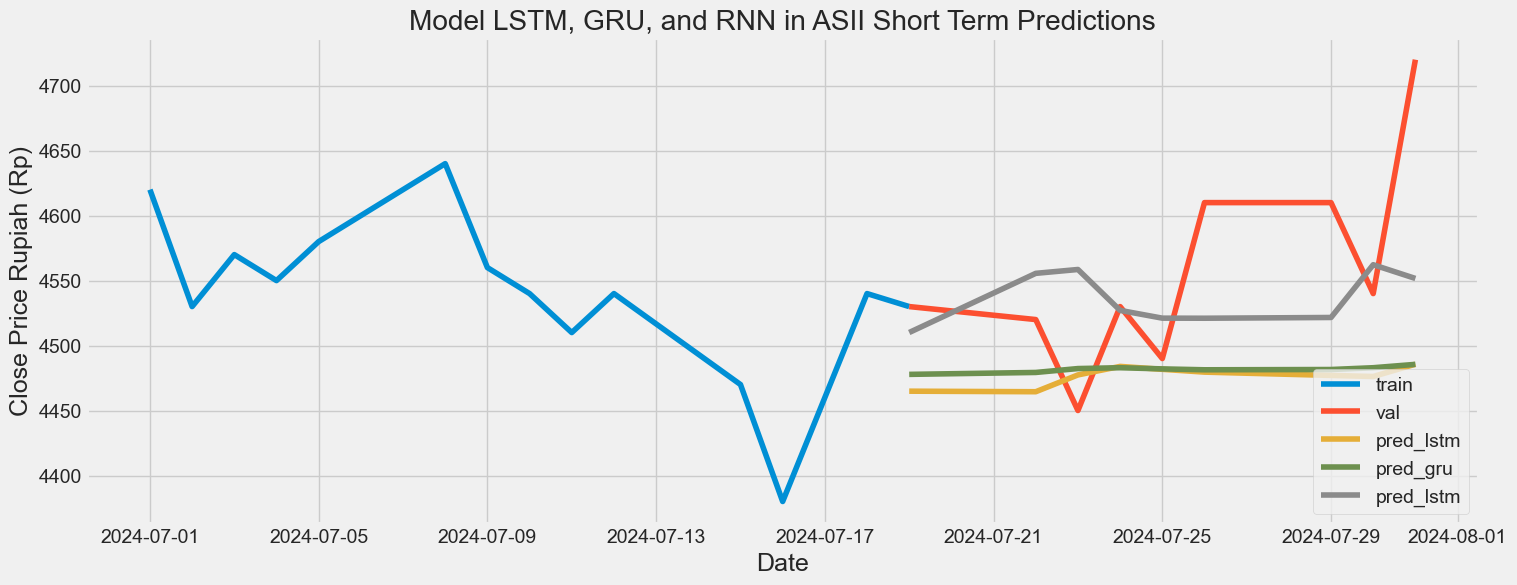

In [46]:
# Visualize the data
# Plot the data
train = ASII[start_date:med_date]
valid = ASII[med_date:end_date]
valid['pred_lstm'] = LSTM_predicted_stock_price
valid['pred_gru'] = GRU_predicted_stock_price
valid['pred_rnn'] = RNN_predicted_stock_price
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model LSTM, GRU, and RNN in ASII Short Term Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupiah (Rp)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid['close'])
plt.plot(valid[['pred_lstm', 'pred_gru', 'pred_rnn']])
plt.legend(['train', 'val', 'pred_lstm', 'pred_gru', 'pred_lstm'], loc='lower right')
plt.show()


In [ ]:
# Evaluating the LSTM
rmse_ASII_short_LSTM = return_rmse(ASII_short_test, LSTM_predicted_stock_price)
norm_rmse_ASII_short_LSTM = return_rmse_norm(ASII_short_test, LSTM_predicted_stock_price)
# Evaluating the RNN
rmse_ASII_short_LSTM = return_rmse(ASII_short_test, LSTM_predicted_stock_price)
norm_rmse_ASII_short_LSTM = return_rmse_norm(ASII_short_test, LSTM_predicted_stock_price)
# Evaluating the sequence
rmse_ASII_short_LSTM = return_rmse(ASII_short_test, LSTM_predicted_stock_price)
norm_rmse_ASII_short_LSTM = return_rmse_norm(ASII_short_test, LSTM_predicted_stock_price)


In [ ]:


dic_res['stock'].append('ADRO')
dic_res['term'].append('short')
dic_res['algorithm'].append('RNN')
dic_res['rmse'].append(rmse)
dic_res['rmse_norm'].append(norm_rmse)